(1, 15000)


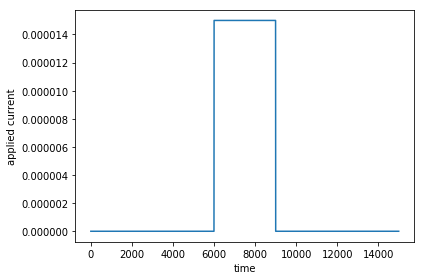

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# import neurons.HH as HH
import Neurapse.Neurons as HH
import Neurapse.utils.CURRENTS as Cur
from Neurapse.Networks import NNetwork_Const

I0 = 15e-6
T = 30e-3
delta_t = 1e-5
n_t = int(5*T//delta_t)+1 #otherwise one-timestep is gone

Sq1 = Cur.SQUARE_PULSE(t_start=6000, t_end=9000, T=n_t)
I = Sq1.generate()
I = I0*I
print(I.shape)
plt.plot(I[0,:])
plt.xlabel('time')
plt.ylabel('applied current')
plt.tight_layout()
plt.show()



In [6]:

C = 1e-6
E_Na = 50e-3
E_k = -77e-3
E_l = -55e-3
g_Na = 120e-3
g_k = 36e-3
g_l = 0.3e-3

N = HH.HH(C, E_Na, E_k, E_l, g_Na, g_k, g_l)
print(N)


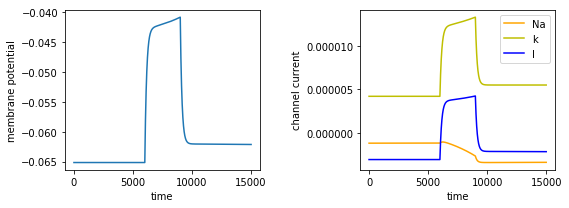

In [7]:
V0 = -0.06515672*np.ones((1,1))
h0 = 0.60159082*np.ones((1,1))
m0 = 0.05196212*np.ones((1,1))
n0 = 0.31527801*np.ones((1,1))

V, h, m, n = N.compute(V0, h0, m0, n0, I, delta_t)
i_Na = g_Na*(m**3)*h*(V-E_Na)
i_k = g_k*(n**4)*(V-E_k)
i_l = g_l*(V-E_l)

plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(V[0,1:])
plt.xlabel('time')
plt.ylabel('membrane potential')

# plt.subplot(2,2,2)
# plt.plot(list(range(n_t)), h[0,1:], 'r', label='h')
# plt.plot(list(range(n_t)), m[0,1:], 'g', label='m')
# plt.plot(list(range(n_t)), n[0,1:], 'b', label='n')
# plt.xlabel('time')
# plt.ylabel('parameter values')
# plt.legend()
# plt.show()

plt.subplot(1,2,2)
plt.plot(i_Na[0,:], 'orange', label='Na')
plt.plot(i_k[0,:], 'y', label='k')
plt.plot(i_l[0,:], 'b', label='l')
plt.legend()
plt.xlabel('time')
plt.ylabel('channel current')
plt.tight_layout()
plt.show()


(3, 10000)
n_rp  20
(3, 1)
n_rp  20
(2, 1)
6


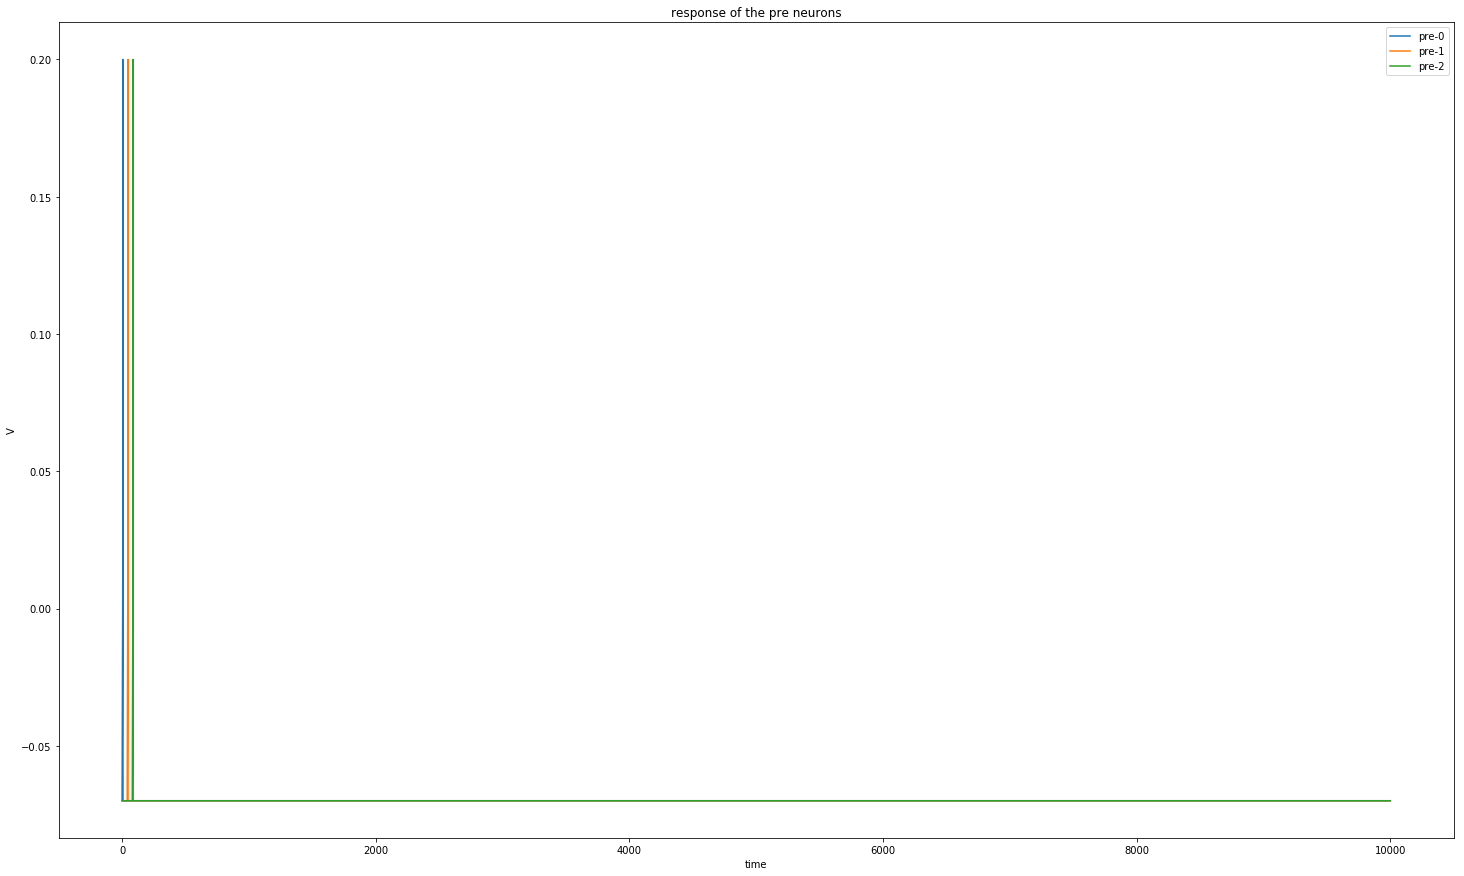

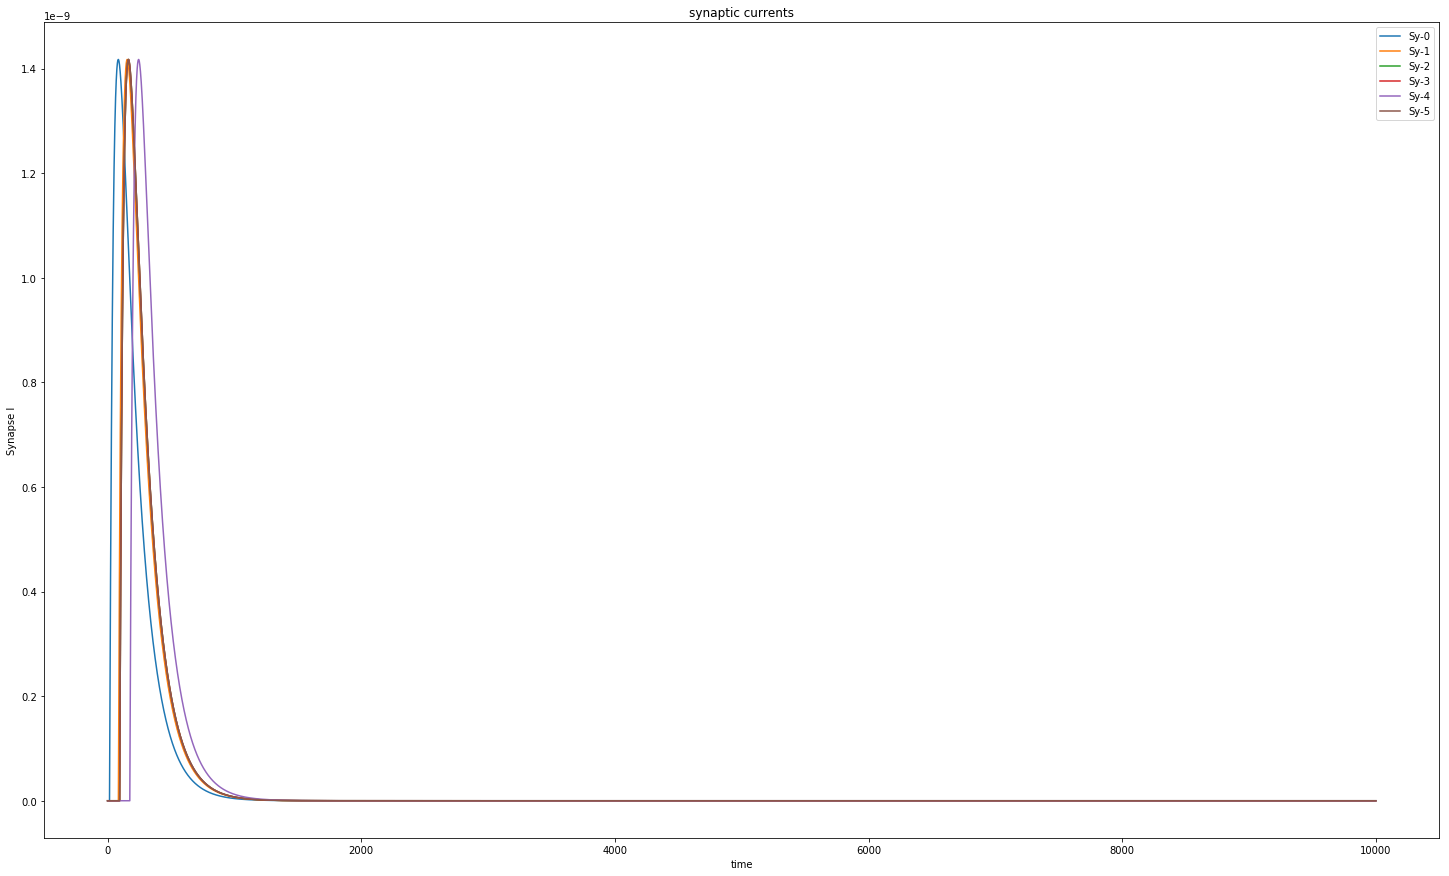

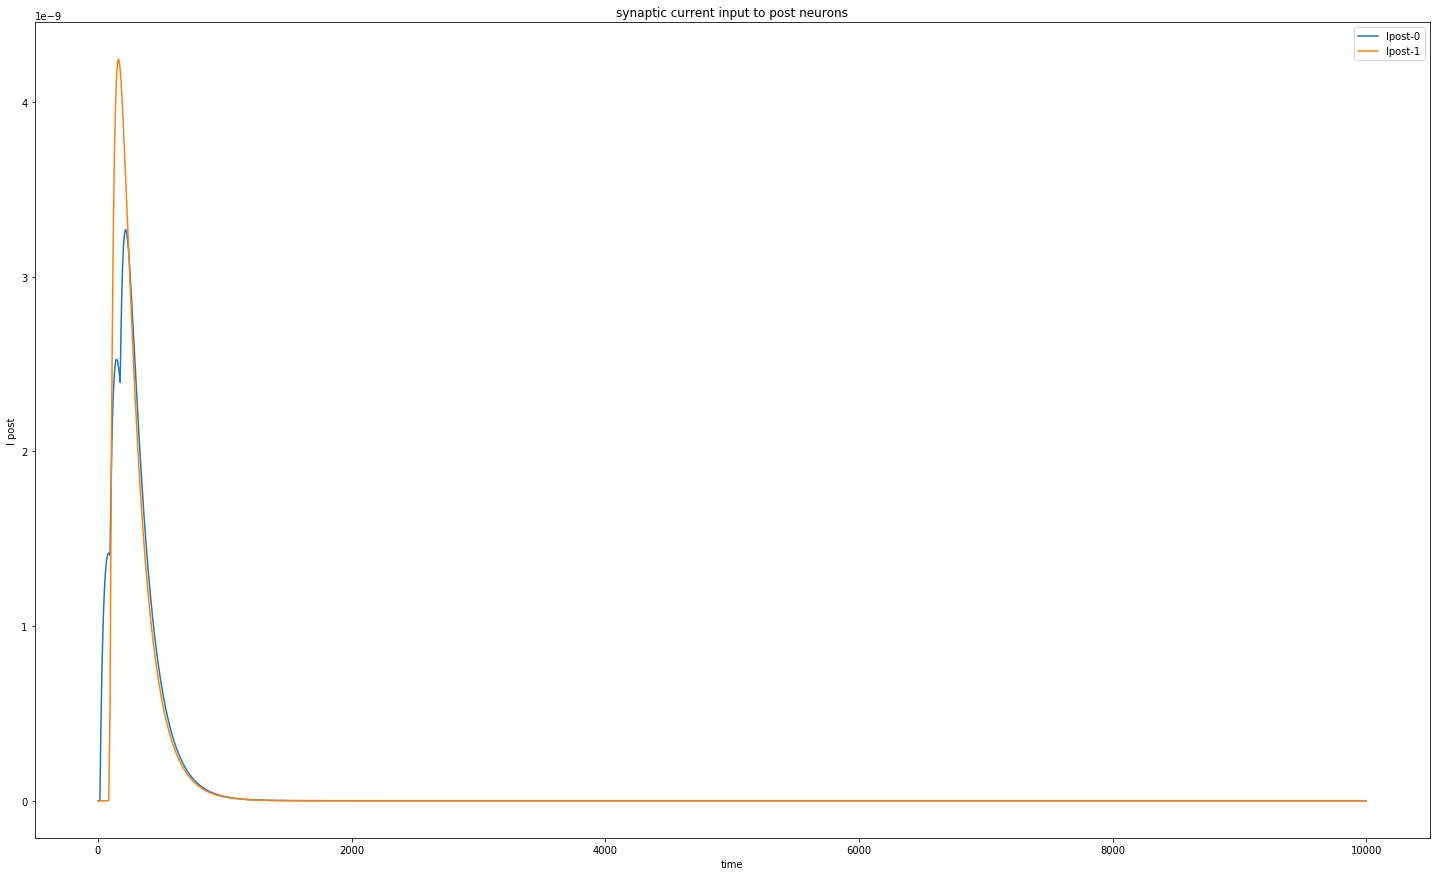

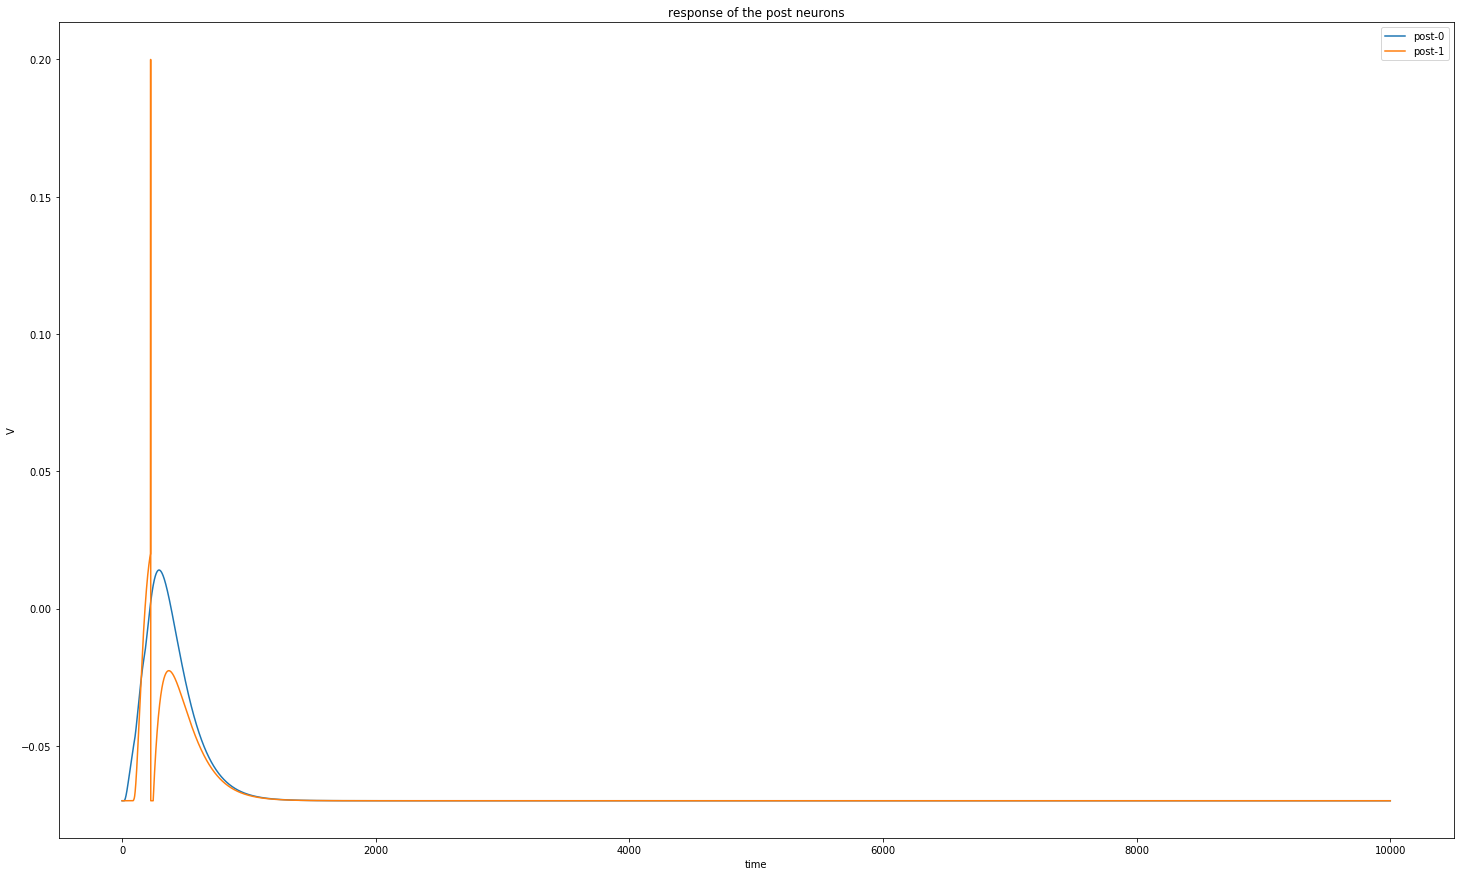

In [8]:
Fanout = [
    [0,1],
    [0,1],
    [0,1]
]
W = [
    [3000,3000],
    [3000,3000],
    [3000,3000]
]
Tau = [
    [1e-3,8e-3],
    [5e-3,5e-3],
     [9e-3,1e-3]
]  

A = NNetwork_Const(Fanout, W, Tau, 3, 2)
print(A)

I_pre = np.array([
    50e-9*Cur.SQUARE_PULSE(0, 10, 10000).generate(),
    50e-9*Cur.SQUARE_PULSE(40, 50, 10000).generate(),
    50e-9*Cur.SQUARE_PULSE(80, 90, 10000).generate(),
]).reshape(3,-1)

print(I_pre.shape)
A.compute(I_pre, 1e-4)
A.display(1)








I shape :  (3, 5000)
I = 250.00pA
I = 350.00pA
I = 450.00pA
2 firing!!
1 firing!!
2 firing!!
2 firing!!
1 firing!!
0 firing!!
2 firing!!
1 firing!!
2 firing!!
2 firing!!
1 firing!!
2 firing!!
1 firing!!
0 firing!!
2 firing!!
2 firing!!
1 firing!!
2 firing!!
1 firing!!
2 firing!!
2 firing!!
0 firing!!
1 firing!!
2 firing!!
2 firing!!
1 firing!!
2 firing!!
1 firing!!
2 firing!!
0 firing!!
2 firing!!
1 firing!!
2 firing!!
1 firing!!
2 firing!!
2 firing!!
1 firing!!
0 firing!!
2 firing!!
1 firing!!
2 firing!!
2 firing!!
1 firing!!
2 firing!!
1 firing!!
2 firing!!
0 firing!!
2 firing!!
1 firing!!
2 firing!!
2 firing!!
1 firing!!
2 firing!!
1 firing!!
0 firing!!
2 firing!!
2 firing!!
1 firing!!
2 firing!!
1 firing!!
2 firing!!
2 firing!!
0 firing!!
1 firing!!
2 firing!!
1 firing!!
2 firing!!
2 firing!!
1 firing!!
2 firing!!
0 firing!!
1 firing!!
2 firing!!
2 firing!!
1 firing!!
2 firing!!
2 firing!!
1 firing!!


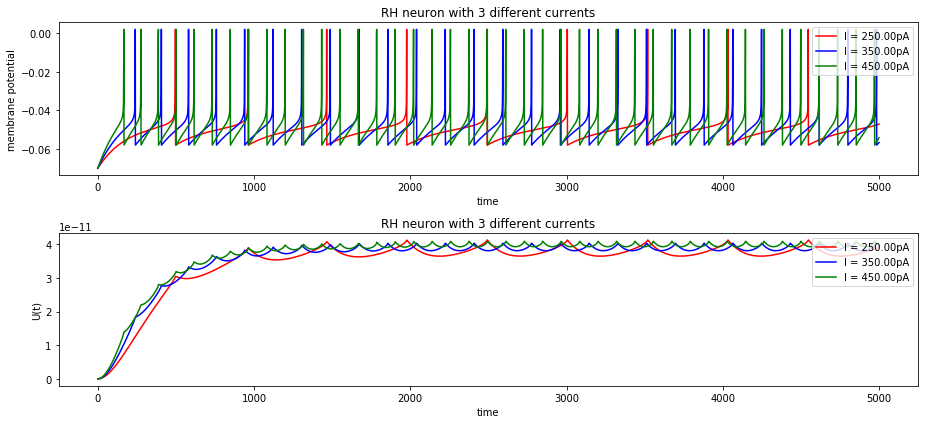

2 firing!!
1 firing!!
2 firing!!
0 firing!!
1 firing!!
2 firing!!
0 firing!!
1 firing!!
2 firing!!
2 firing!!
1 firing!!
0 firing!!
2 firing!!
1 firing!!
2 firing!!
2 firing!!
1 firing!!
0 firing!!
2 firing!!
1 firing!!
2 firing!!
0 firing!!
1 firing!!
2 firing!!


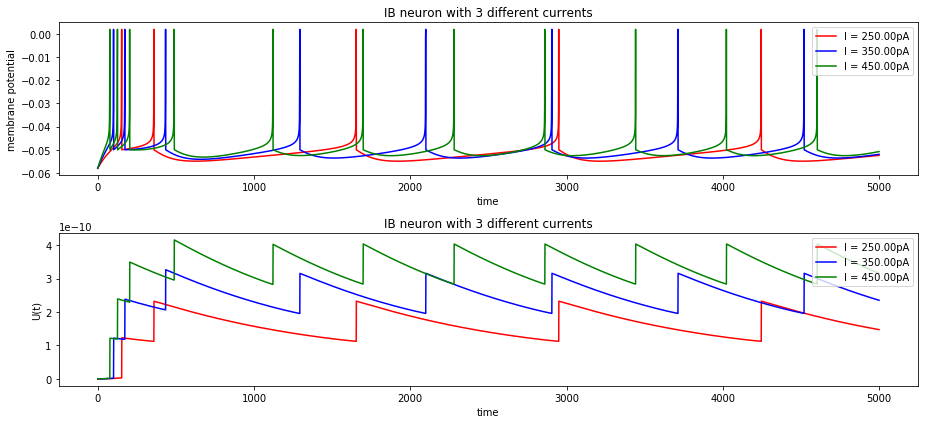

2 firing!!
1 firing!!
2 firing!!
1 firing!!
2 firing!!
0 firing!!
1 firing!!
2 firing!!
0 firing!!
2 firing!!
1 firing!!
0 firing!!
2 firing!!
1 firing!!
2 firing!!
2 firing!!
0 firing!!
2 firing!!
0 firing!!
1 firing!!
1 firing!!
2 firing!!
2 firing!!
1 firing!!
2 firing!!
1 firing!!
0 firing!!
0 firing!!
2 firing!!
2 firing!!
1 firing!!
1 firing!!
2 firing!!
0 firing!!
0 firing!!
2 firing!!
1 firing!!
2 firing!!
1 firing!!
2 firing!!
1 firing!!
1 firing!!
2 firing!!
2 firing!!
0 firing!!
0 firing!!
2 firing!!


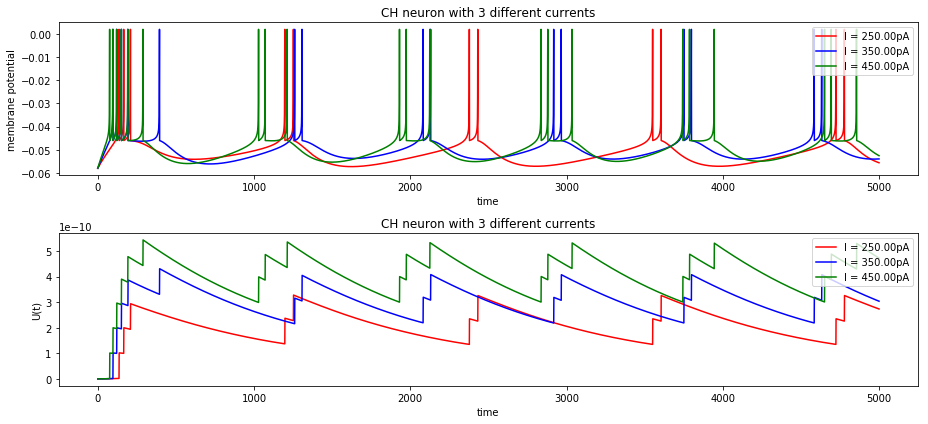

In [9]:
import numpy as np
import matplotlib.pyplot as plt

import Neurapse
from Neurapse.Neurons import AEF

######## RS model ############
C1 = 200*(10**-12)
gl1 = 10*(10**-9)
El1 = -70*(10**-3)
Vt1 = -50*(10**-3)
Delt1 = 2*(10**-3)
a1 = 2*(10**-9)
tw1 = 30*(10**-3)
b1 = 0*(10**-12)
Vr1 = -58*(10**-3)
######## IB model ############
C2 = 130*(10**-12)
gl2 = 18*(10**-9)
El2 = -58*(10**-3)
Vt2 = -50*(10**-3)
Delt2 = 2*(10**-3)
a2 = 4*(10**-9)
tw2 = 150*(10**-3)
b2 = 120*(10**-12)
Vr2 = -50*(10**-3)
######## CH model ############
C3 = 200*(10**-12)
gl3 = 10*(10**-9)
El3 = -58*(10**-3)
Vt3 = -50*(10**-3)
Delt3 = 2*(10**-3)
a3 = 2*(10**-9)
tw3 = 120*(10**-3)
b3 = 100*(10**-12)
Vr3 = -46*(10**-3)

'''
# to find the initial values for steady state
import numpy as np
from scipy.optimize import newton_krylov
def get_val(x, Vi):
    if x == 'RS':
        gl = gl1
        Delt = Delt1
        Vt = Vt1
        a = a1
        El = El1
    elif x == 'IB':
        gl = gl2
        Delt = Delt2
        Vt = Vt2
        a = a2
        El = El2
    elif x == 'CH':
        gl = gl3
        Delt = Delt3
        Vt = Vt3
        a = a3
        El = El3
    
    val = (gl*Delt*np.exp((Vi-Vt)/(Delt))) - (Vi-El)*(gl+a)
    return val
def get_U(x, Vi):
    if x == 'RS':
        gl = gl1
        Delt = Delt1
        Vt = Vt1
        a = a1
        El = El1
    elif x == 'IB':
        gl = gl2
        Delt = Delt2
        Vt = Vt2
        a = a2
        El = El2
    elif x == 'CH':
        gl = gl3
        Delt = Delt3
        Vt = Vt3
        a = a3
        El = El3
    uval = a*(Vi-El)
    return uval
def residual_RS(V):
    r = get_val('RS', V)
    return r
def residual_IB(V):
    r = get_val('IB', V)
    return r
def residual_CH(V):
    r = get_val('CH', V)
    return r
print('-------- RS ----------')
guess = np.array([-0.065])
sol = newton_krylov(residual_RS, guess, f_tol=1e-8, x_tol=1e-9, method='lgmres', verbose=1)
print('Residual: %g' % abs(residual_RS(sol)).max())
print('solution V: {}'.format(sol))
print('solution U: {}'.format(get_U('RS',sol)))
print('-------- IB ----------')
guess = np.array([-0.065])
sol = newton_krylov(residual_IB, guess, f_tol=1e-8, x_tol=1e-9, method='lgmres', verbose=1)
print('Residual: %g' % abs(residual_IB(sol)).max())
print('solution V: {}'.format(sol))
print('solution U: {}'.format(get_U('IB',sol)))
print('-------- CH ----------')
guess = np.array([-0.065])
sol = newton_krylov(residual_CH, guess, f_tol=1e-8, x_tol=1e-9, method='lgmres', verbose=1)
print('Residual: %g' % abs(residual_CH(sol)).max())
print('solution V: {}'.format(sol))
print('solution U: {}'.format(get_U('CH',sol)))
# ------------ output ---------- 
# -------- RS ----------
# 0:  |F(x)| = 1.75075e-14; step 1; tol 7.6656e-08
# 1:  |F(x)| = 2.39061e-22; step 1; tol 1.67809e-16
# 2:  |F(x)| = 7.15089e-26; step 1; tol 8.05273e-08
# Residual: 7.15089e-26
# solution V: [-0.06999992]
# solution U: [1.51338825e-16]
# -------- IB ----------
# 0:  |F(x)| = 5.71067e-13; step 1; tol 1.23727e-05
# 1:  |F(x)| = 5.76427e-17; step 1; tol 9.16973e-09
# 2:  |F(x)| = 3.91204e-24; step 1; tol 4.14535e-15
# 3:  |F(x)| = 3.43312e-27; step 1; tol 6.93129e-07
# Residual: 3.43312e-27
# solution V: [-0.05796957]
# solution U: [1.217222e-13]
# -------- CH ----------
# 0:  |F(x)| = 3.17273e-13; step 1; tol 1.28362e-05
# 1:  |F(x)| = 3.32277e-17; step 1; tol 9.87135e-09
# 2:  |F(x)| = 2.29726e-24; step 1; tol 4.30194e-15
# 3:  |F(x)| = 1.969e-27; step 1; tol 6.61166e-07
# Residual: 1.969e-27
# solution V: [-0.057969]
# solution U: [6.2005901e-14]
'''

neuronRHs = AEF(C1, gl1, El1, Vt1, Delt1, a1, tw1, b1, Vr1, num_neurons=3)
neuronIBs = AEF(C1, gl2, El2, Vt2, Delt2, a2, tw2, b2, Vr2, num_neurons=3)
neuronCHs = AEF(C1, gl3, El3, Vt3, Delt3, a3, tw3, b3, Vr3, num_neurons=3)

delta_t = 0.1*(10**-3)
T = 500*(10**-3)
I1 = np.array([250*(10**-12)]*int(T/delta_t))
I1 = I1.reshape(1,-1)
I2 = np.array([350*(10**-12)]*int(T/delta_t))
I2 = I2.reshape(1,-1)
I3 = np.array([450*(10**-12)]*int(T/delta_t))
I3 = I3.reshape(1,-1)
I = np.concatenate([I1, I2, I3], axis=0)
print('I shape : ', I.shape)
print('I = {:.2f}pA'.format(I1[0,0]*(10**12)))
print('I = {:.2f}pA'.format(I2[0,0]*(10**12)))
print('I = {:.2f}pA'.format(I3[0,0]*(10**12)))

V10 = -0.06999992
U10 = 1.51338825e-16

V20 = -0.05796957
U20 = 1.217222e-13

V30 = -0.057969
U30 = 6.2005901e-14

def simulate_neuron(type):
    if type == 'RH':
        V0, U0 = V10*np.ones(shape=(3,1)), U10*np.ones(shape=(3,1))
        neurons = neuronRHs
    elif type == 'IB':
        V0, U0 = V20*np.ones(shape=(3,1)), U20*np.ones(shape=(3,1))
        neurons = neuronIBs
    elif type == 'CH':
        V0, U0 = V30*np.ones(shape=(3,1)), U30*np.ones(shape=(3,1))
        neurons = neuronCHs
    V, U = neurons.compute(V0, U0, I, delta_t)

    plt.figure(figsize=(13, 6))
    plt.subplot(2,1,1)
    plt.title('{} neuron with 3 different currents'.format(type))
    plt.plot(V[0,:], 'r', label='I = {:.2f}pA'.format(I[0,0]*(10**12)))
    plt.plot(V[1,:], 'b', label='I = {:.2f}pA'.format(I[1,0]*(10**12)))
    plt.plot(V[2,:], 'g', label='I = {:.2f}pA'.format(I[2,0]*(10**12)))
    plt.ylabel('membrane potential')
    plt.xlabel('time')
    plt.legend(loc=1)

    plt.subplot(2,1,2)
    plt.title('{} neuron with 3 different currents'.format(type))
    plt.plot(U[0,:], 'r', label='I = {:.2f}pA'.format(I[0,0]*(10**12)))
    plt.plot(U[1,:], 'b', label='I = {:.2f}pA'.format(I[1,0]*(10**12)))
    plt.plot(U[2,:], 'g', label='I = {:.2f}pA'.format(I[2,0]*(10**12)))
    plt.ylabel('U(t)')
    plt.xlabel('time')
    plt.legend(loc=1)

    plt.tight_layout()
    plt.show()

simulate_neuron('RH')
simulate_neuron('IB')
simulate_neuron('CH')